In [2]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import re
import seaborn as sns

In [3]:
'''
OBJETIVOS DA SEMANA:
- Analisar a mudança dos grupos de acordo com o K
- Analisar atraves de 2 testes a porcentagem de mudança dos grupos
- Analisar a consistencia dos grupos
'''

'\nOBJETIVOS DA SEMANA:\n- Analisar a mudança dos grupos de acordo com o K\n- Analisar atraves de 2 testes a porcentagem de mudança dos grupos\n- Analisar a consistencia dos grupos\n'

In [4]:
# Pasta contendo os arquivos JSON
pasta_keywords = 'keywords_k'

# Lista para armazenar os DataFrames de cada arquivo
dataframes = []

# Itera sobre os arquivos na pasta
for nome_arquivo in os.listdir(pasta_keywords):
    caminho_arquivo = os.path.join(pasta_keywords, nome_arquivo)

    try:
        # Extrai o valor de k do nome do arquivo
        match = re.search(r'keywords_k=(\d+)', nome_arquivo)
        if match:
            k_value = int(match.group(1))
        else:
            k_value = None

        # Leitura do arquivo JSON com o encoding utf-8-sig
        with open(caminho_arquivo, 'r', encoding='utf-8-sig') as f:
            data = json.load(f)

        # Extrai a lista de itens sob a chave 'items'
        items = data.get('network', {}).get('items', [])

        # Converte para DataFrame
        df = pd.json_normalize(items)

        # Adiciona uma coluna 'k' com o valor extraído do nome do arquivo
        df['k'] = k_value

        # Adiciona o DataFrame à lista
        dataframes.append(df)

        # Conta o número de clusters únicos para cada valor de k
        num_clusters = df['cluster'].nunique()

    except json.JSONDecodeError as e:
        print(f"Erro ao decodificar o JSON em {caminho_arquivo}: {e}")
    except Exception as e:
        print(f"Erro desconhecido em {caminho_arquivo}: {e}")

# Concatena todos os DataFrames em um único DataFrame
df_completo = pd.concat(dataframes, ignore_index=True)

#Ordena o DataFrame por k
df_completo.sort_values(by='k', inplace=True)

# imprimir a cabeça do dataframe
df_completo.head()

,id,label,x,y,cluster,weights.Links,weights.Total link strength,weights.Occurrences,scores.Avg. pub. year,scores.Avg. citations,scores.Avg. norm. citations,k
0,3,100 % reserves,1.0075,-0.1745,15,8.0,8.0,1.0,2017.0,3.0,0.8229,1
645,1494,p0,-0.7415,0.1297,7,8.0,8.0,1.0,2021.0,0.0,0.0000,1
646,1495,p00,-0.5293,0.2064,16,9.0,9.0,1.0,2019.0,7.0,2.1990,1
647,1496,p1,-0.4170,-0.0187,7,7.0,7.0,1.0,2021.0,0.0,0.0000,1
648,1498,p14,0.2940,0.5331,18,19.0,20.0,2.0,2021.0,0.5,0.2874,1


In [5]:
# Vamos analisar apenas os dados com k = 9 e k = 10
df_910 = df_completo[(df_completo['k'] == 9) | (df_completo['k'] == 10)]

# Criação do dicionário para armazenar informações sobre os clusters para k=9 e k=10
cluster_info = {}

# Itera sobre os labels únicos no DataFrame df_910
for label in df_910['label'].unique():
    # Filtra o DataFrame para o label específico
    label_df = df_910[df_910['label'] == label]
    
    # Obtém o cluster para k=9, se existir
    cluster_k9 = label_df[label_df['k'] == 9]['cluster'].values[0] if label_df[label_df['k'] == 9].shape[0] > 0 else None
    
    # Obtém o cluster para k=10, se existir
    cluster_k10 = label_df[label_df['k'] == 10]['cluster'].values[0] if label_df[label_df['k'] == 10].shape[0] > 0 else None
    
    # Adiciona as informações ao dicionário
    cluster_info[label] = {'k=9': cluster_k9, 'k=10': cluster_k10}

# Imprime o dicionário
print("Dicionário de informações sobre clusters para k=9 e k=10:")
print(cluster_info)

Dicionário de informações sobre clusters para k=9 e k=10:
{'mises': {'k=9': 5, 'k=10': 5}, 'methodology': {'k=9': 5, 'k=10': 3}, 'methodological individualism': {'k=9': 4, 'k=10': 5}, 'market process': {'k=9': 3, 'k=10': 1}, 'history of economic thought': {'k=9': 1, 'k=10': 3}, 'liberalism': {'k=9': 1, 'k=10': 3}, 'knowledge': {'k=9': 3, 'k=10': 1}, 'institutions': {'k=9': 1, 'k=10': 3}, 'innovation': {'k=9': 3, 'k=10': 1}, 'monetary equilibrium': {'k=9': 2, 'k=10': None}, 'macroeconomics': {'k=9': 2, 'k=10': 2}, 'monetary policy': {'k=9': 2, 'k=10': 2}, 'social capital': {'k=9': 1, 'k=10': None}, 'praxeology': {'k=9': 4, 'k=10': 5}, 'property rights': {'k=9': 4, 'k=10': 4}, 'public choice': {'k=9': 5, 'k=10': 4}, 'regulation': {'k=9': 3, 'k=10': 1}, 'robust political economy': {'k=9': 2, 'k=10': 4}, 'self-governance': {'k=9': 1, 'k=10': None}, 'spontaneous order': {'k=9': 1, 'k=10': 1}, 'structure of production': {'k=9': 2, 'k=10': 2}, 'subjectivism': {'k=9': 1, 'k=10': 3}, 'transacti

In [6]:
#imprimir quantos labels temos no dicionario
print(f"Quantidade de labels: {len(cluster_info)}")

#imprimir quantos labels temos para k=9 e k=10 em df_910
print(f"Quantidade de labels com k=9: {df_910[df_910['k'] == 9]['label'].nunique()}")
print(f"Quantidade de labels com k=10: {df_910[df_910['k'] == 10]['label'].nunique()}")

#transformar o dicionario em um dataframe
df_cluster_info = pd.DataFrame.from_dict(cluster_info, orient='index')

#ordenar o dataframe por k=9 e k=10
df_cluster_info.sort_values(by=['k=9', 'k=10'], inplace=True)

#substituir NaN por 0
df_cluster_info.fillna(0, inplace=True)

#k=10 é int
df_cluster_info['k=10'] = df_cluster_info['k=10'].astype(int)

df_cluster_info

Quantidade de labels: 57
Quantidade de labels com k=9: 57
Quantidade de labels com k=10: 48


,k=9,k=10
spontaneous order,1,1
history of economic thought,1,3
liberalism,1,3
institutions,1,3
subjectivism,1,3
adam smith,1,3
carl menger,1,3
b53,1,4
hermeneutics,1,5
social capital,1,0


In [7]:
#Contar o numero de labels de k=9
df_cluster_info['k=9'].value_counts()

1    14
2    14
3    13
4    10
5     6
Name: k=9, dtype: int64

In [8]:
#para cada cluster de k=9, contar o numero de clusteres relacionados em k=10. Adicionar o resultado em um dicionario
cluster_count = {}
for cluster in df_cluster_info['k=9'].unique():
    cluster_count[cluster] = df_cluster_info[df_cluster_info['k=9'] == cluster]['k=10'].value_counts().to_dict()

#imprimir o dicionario
print(cluster_count)


{1: {3: 6, 0: 5, 1: 1, 4: 1, 5: 1}, 2: {2: 11, 0: 2, 4: 1}, 3: {1: 10, 4: 3}, 4: {5: 5, 3: 2, 4: 2, 0: 1}, 5: {4: 2, 5: 2, 3: 1, 0: 1}}


In [9]:
#criar um dataframe com uma tabela com o tamanho de k=9 e k=10 e preencher com NaN
df_cluster_count = pd.DataFrame(index=df_cluster_info['k=9'].unique(), columns=df_cluster_info['k=10'].unique()) 

#ordenar as colunas de forma crescente
df_cluster_count.sort_index(axis=0, inplace=True)
df_cluster_count.sort_index(axis=1, inplace=True)

#preencher o dataframe com os valores do dicionario
for k9, k9_dict in cluster_count.items():
    for k10, count in k9_dict.items():
        df_cluster_count.loc[k9, k10] = count

#trocar o nome da coluna 0 por NaN
df_cluster_count.rename(columns={0: 'NaN'}, inplace=True)

#imprimir o dataframe
df_cluster_count

,NaN,1,2,3,4,5
1,5,1,NaN,6,1,1
2,2,NaN,11,NaN,1,NaN
3,NaN,10,NaN,NaN,3,NaN
4,1,NaN,NaN,2,2,5
5,1,NaN,NaN,1,2,2


In [10]:

df_cluster_porcentagem = df_cluster_count.copy()

#calcular a porcentagem de mudança de k=9 para k=10 por linha
for index, row in df_cluster_porcentagem.iterrows():
    total = row.sum()
    df_cluster_porcentagem.loc[index] = row.apply(lambda x: (x/total)*100)


#imprimir o dataframe
df_cluster_porcentagem

,NaN,1,2,3,4,5
1,35.714286,7.142857,NaN,42.857143,7.142857,7.142857
2,14.285714,NaN,78.571429,NaN,7.142857,NaN
3,NaN,76.923077,NaN,NaN,23.076923,NaN
4,10.0,NaN,NaN,20.0,20.0,50.0
5,16.666667,NaN,NaN,16.666667,33.333333,33.333333


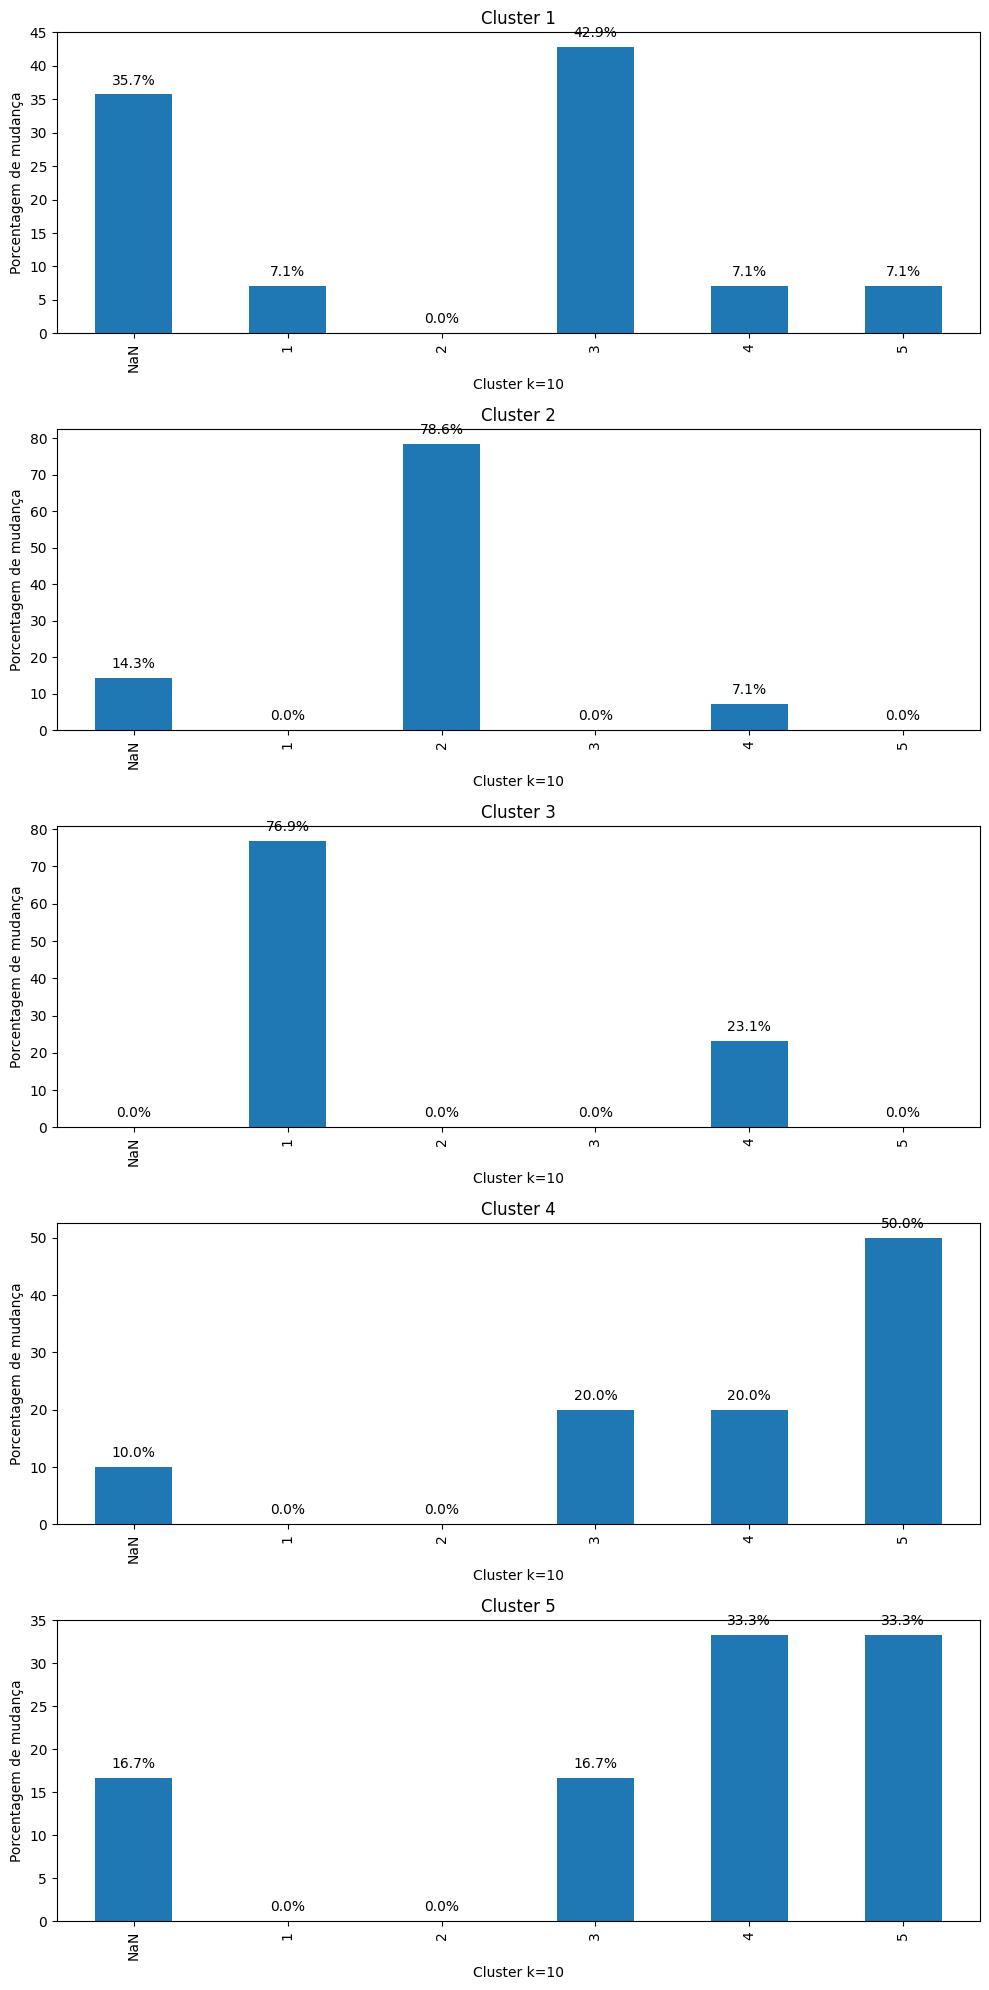

In [11]:
#Plotar 5 graficos de barras com as porcentagens de mudança de k=9 para k=10

fig, ax = plt.subplots(5, 1, figsize=(10, 20))

#iterar sobre os 5 primeiros clusters
for i, cluster in enumerate(df_cluster_porcentagem.index[:5]):
    #plotar o grafico de barras
    df_cluster_porcentagem.loc[cluster].plot.bar(ax=ax[i])
    
    #adicionar titulo e labels
    ax[i].set_title(f'Cluster {cluster}')
    ax[i].set_xlabel('Cluster k=10')
    ax[i].set_ylabel('Porcentagem de mudança')
    
    #adicionar o valor de cada barra
    for p in ax[i].patches:
        ax[i].annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
plt.tight_layout()

#salvar a imagem 
plt.savefig('figure/cluster_change.png')

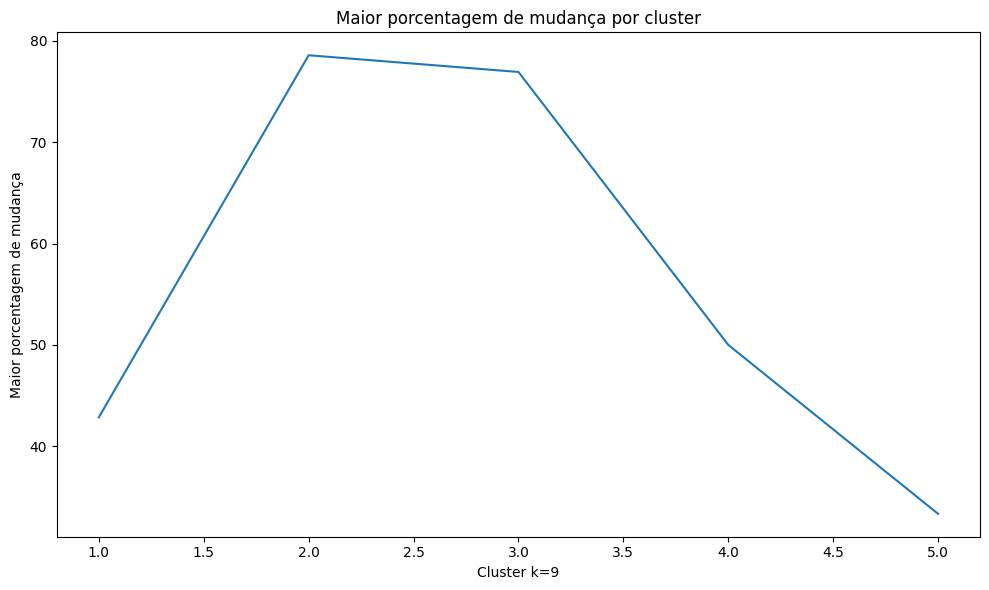

In [12]:
#salvara maior porcentagem por cluster
df_cluster_maior_porcentagem = df_cluster_porcentagem.max(axis=1)

#imprimir o dataframe
df_cluster_maior_porcentagem

#plotar um grafico de linha com a maior porcentagem de mudança por cluster
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cluster_maior_porcentagem)
plt.xlabel('Cluster k=9')
plt.ylabel('Maior porcentagem de mudança')
plt.title('Maior porcentagem de mudança por cluster')
plt.tight_layout()

#salvar a imagem
plt.savefig('figure/cluster_change_line.png')


In [13]:
#imprimir o dataframe
df_cluster_maior_porcentagem

1    42.857143
2    78.571429
3    76.923077
4    50.000000
5    33.333333
dtype: float64